In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Deep Learning for Prediction/Final Project/Zixin_model/lc_loan.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(887379, 74)

# Data Cleaning-lc_loan (for training)

## 1 missing value NaN

### 1.1 >80% nan

In [6]:
##Finding the the count and percentage of values that are missing in the dataframe.
df_null = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})

##printing columns with null count more than 0
df_null[df_null['Count'] > 0] 


,Count,Percent
emp_title,51462,5.799326
emp_length,44825,5.051393
annual_inc,4,0.000451
desc,761351,85.797726
title,152,0.017129
delinq_2yrs,29,0.003268
earliest_cr_line,29,0.003268
inq_last_6mths,29,0.003268
mths_since_last_delinq,454312,51.197065
mths_since_last_record,750326,84.555303


1 desc can be used after

In [7]:
#drop any columns where 80% or more data is missing. 
df1 = df.dropna(axis=1, thresh=int(0.80*len(df)))

In [8]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [9]:
df1['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [10]:
df1.shape

(887379, 52)

In [11]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [12]:
df_LC=df1[['loan_amnt', 'funded_amnt','funded_amnt_inv','term','int_rate', 'installment', 'grade', 'sub_grade','emp_title','emp_length',
'home_ownership','annual_inc','verification_status','issue_d','loan_status','pymnt_plan','purpose','title','dti', 'delinq_2yrs','earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]
  #delete 'id','member_id','url','zip_code', 'addr_state'

In [13]:
df_LC.shape

(887379, 47)

### 1.2 'collections_12_mths_ex_med'

In [14]:
df_LC.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')

collections_12_mths_ex_med will change them null to 0 as missing vaules show lack of open trades.

In [15]:
df_LC['collections_12_mths_ex_med']=df_LC['collections_12_mths_ex_med'].replace(np.nan,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 1.3 'mths_since_last_major_derog'/'mths_since_last_delinq'
'mths_since_last_major_derog'-->'derog'\
'mths_since_last_delinq'-->'delinq'

Null values in these columns can't be replaced with 0 as it would mean that the last occurence was very recent. My understanding of these variables is that the key information is whether the specific action took place (delinquency, public record, worse rating), so I will turn these into binary categories of Yes (1), No (0).

In [16]:
df_LC['mths_since_last_major_derog']=df['mths_since_last_major_derog']
df_LC['mths_since_last_delinq']=df['mths_since_last_delinq']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
df_LC.loc[(df_LC.mths_since_last_delinq.notnull()),'delinq']=1
df_LC.loc[(df_LC.mths_since_last_delinq.isnull()),'delinq']=0

df_LC.loc[(df_LC.mths_since_last_major_derog.notnull()),'derog']=1
df_LC.loc[(df_LC.mths_since_last_major_derog.isnull()),'derog']=0


df_LC.drop(['mths_since_last_delinq','mths_since_last_major_derog'],axis=1,inplace=True)



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

### 1.4 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'

 tot_coll_amt, tot_cur_bal, total_rev_hi_lim - these are three totals that have missing values for the same observations. I will change them to 0 as they should mean that the total is 0.

In [18]:
variables2=['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

for e in variables2:
    df_LC[e]=df_LC[e].replace(np.nan,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### 1.5 revol_util
There is no clear answer to how to approach this variable, I will use 0 as this is the most common value and the amount of missing values is marginal.

In [19]:
pd.value_counts(df_LC.revol_util).to_frame()

,revol_util
0.00,3540
58.00,1780
53.00,1766
59.00,1765
61.00,1757
...,...
121.10,1
21.92,1
12.42,1
121.40,1


In [20]:
df_LC.revol_util=df_LC.revol_util.replace(np.nan,0)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### 1.6 'acc_now_delinq', 'open_acc', 'total_acc','pub_rec','delinq_2yrs','inq_last_6mths','earliest_cr_line','annual_inc'
There are seven variables with 3 missing values, this is such a small number that I will just replace NaN with most common values.

In [21]:
variables3=['acc_now_delinq', 'open_acc', 'total_acc','pub_rec','delinq_2yrs','inq_last_6mths','earliest_cr_line','annual_inc']

for e in variables3:
    df_LC[e]=df_LC[e].replace(np.nan,df_LC[e].mode()[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## 2 look at each variables

### 2.1 describe a reason for the loan 'title'/'purpose' ('title' dropped)

In [22]:
print(pd.value_counts(df_LC.title).to_frame())
print(pd.value_counts(df_LC.purpose).to_frame())

                                 title
Debt consolidation              414001
Credit card refinancing         164331
Home improvement                 40112
Other                            31892
Debt Consolidation               15760
...                                ...
consolidation better rate            1
Home Improvement/Christmas           1
Debt & Credit Consolidation          1
All credit cards paid                1
consolidation and home project       1

[63144 rows x 1 columns]
                    purpose
debt_consolidation   524215
credit_card          206182
home_improvement      51829
other                 42894
major_purchase        17277
small_business        10377
car                    8863
medical                8540
moving                 5414
vacation               4736
house                  3707
wedding                2347
renewable_energy        575
educational             423


In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_LC['purpose'])
purpose_label=le.transform(df_LC['purpose'])
del df_LC['purpose']
df_LC['purpose']=purpose_label

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df_LC.drop(columns=['title'],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


As 'title' includes too many catogries which is less helpful, so that we will use 'purpose', and drop 'title'

### 2.2 'application_type' binary

In [25]:
pd.value_counts(df_LC.application_type).to_frame()

,application_type
INDIVIDUAL,886868
JOINT,511


In [26]:
app_type={'INDIVIDUAL':0,'JOINT':1}
df_LC.application_type.replace(app_type,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


### 2.3 'term'

In [27]:
df_LC['term_label']=np.where(df_LC["term"].str.contains("36 months"),36,60)
del df_LC['term']
df_LC.rename(columns={"term_label": "term"},inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
df_LC.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,delinq,derog,purpose,term
0,5000.0,5000.0,4975.0,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,36
1,2500.0,2500.0,2500.0,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,60
2,2400.0,2400.0,2400.0,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,11,36
3,10000.0,10000.0,10000.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,Jan-2015,0.0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,9,36
4,3000.0,3000.0,3000.0,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Jan-2016,0.0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,9,60


### 2.4 'grade'/'sub_grade'






In [29]:
#pd.value_counts(df_LC.grade).to_frame()
grade=df_LC.grade.unique()
grade.sort()
for x,e in enumerate(grade):
    df_LC.grade.replace(to_replace=e,value=x,inplace=True)
  

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [30]:
pd.value_counts(df_LC.sub_grade).to_frame()
sub_grade=df_LC.sub_grade.unique()
sub_grade.sort()
for x,e in enumerate(sub_grade):
    df_LC.sub_grade.replace(to_replace=e,value=x,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


### 2.5 'emp_title'/'emp_length' ('emp_title' dropped)
 describe title and length of employment

In [31]:
pd.value_counts(df_LC.emp_title).to_frame()

,emp_title
Teacher,13469
Manager,11240
Registered Nurse,5525
Owner,5376
RN,5355
...,...
Robla School District,1
"Printing, Engineering & Maintenance Mgr",1
united states Navy,1
Physician Asisstant,1


Title has 212 thousand categories so it will be dropped.

In [32]:
df_LC.drop(columns=['emp_title'],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
pd.value_counts(df_LC.emp_length).to_frame()

,emp_length
10+ years,291569
2 years,78870
< 1 year,70605
3 years,70026
1 year,57095
5 years,55704
4 years,52529
7 years,44594
8 years,43955
6 years,42950


In [34]:
df_LC['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [35]:
emp_len={'nan':0,'< 1 year':1,'1 year':2,'2 years':3,'3 years':4,'4 years':5,'5 years':6,'6 years':7,'7 years':8,'8 years':9,'9 years':10,'10+ years':11}
df_LC.emp_length.replace(emp_len,inplace=True)
df_LC.emp_length=df_LC.emp_length.replace(np.nan,0)
df_LC.emp_length.unique()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([11.,  1.,  2.,  4.,  9., 10.,  5.,  6.,  7.,  3.,  8.,  0.])

### 2.6 'home_ownership'

Home ownership variable should be informative for model as individuals who own their home should be much safer clients that ones that only rent it.

In [36]:
pd.value_counts(df_LC.home_ownership).to_frame()

,home_ownership
MORTGAGE,443557
RENT,356117
OWN,87470
OTHER,182
NONE,50
ANY,3


drop the rows of ANY

In [37]:
df_LC = df_LC[df_LC.home_ownership != 'ANY']

In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_LC['home_ownership'])
home_ownership_label=le.transform(df_LC['home_ownership'])
del df_LC['home_ownership']
df_LC['home_ownership']=home_ownership_label

### 2.7 'verification_status'

In [39]:
pd.value_counts(df_LC.verification_status).to_frame()

,verification_status
Source Verified,329556
Verified,291070
Not Verified,266750


In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_LC['verification_status'])
verification_status_label=le.transform(df_LC['verification_status'])
del df_LC['verification_status']
df_LC['verification_status']=verification_status_label

### 2.8 'pymnt_plan' (dropped)

In [41]:
pd.value_counts(df_LC.pymnt_plan).to_frame()

,pymnt_plan
n,887366
y,10


as y <<n

In [42]:
del df_LC['pymnt_plan']

### 2.9 'initial_list_status'

In [43]:
pd.value_counts(df_LC.initial_list_status).to_frame()

,initial_list_status
f,456847
w,430529


In [44]:
int_status={'w':0,'f':1}
df_LC.initial_list_status.replace(int_status,inplace=True)

### 2.10 'policy_code' (dropped)

In [45]:
pd.value_counts(df_LC.policy_code).to_frame()

,policy_code
1.0,887376


In [46]:
del df_LC['policy_code']

Policy code has only 1 value so will be dropped.

### 2.11 'recoveries'/'collection_recovery_fee' (dropped)

Recoveries variable informs about post charge off gross recovery. Will transform this to binary that will show whether this loan was recoveried. Will drop 'collection_recovery_fee' as it is doubling similar information.\
'recoveries'-->'recovery'

In [47]:
pd.value_counts(df_LC.recoveries).to_frame()
df_LC['recovery'] = np.where((df_LC.recoveries != 0.00), 1, 0)


In [48]:
del df_LC['recoveries']

In [49]:
del df_LC['collection_recovery_fee']

### 2.12 transformed to date time (5):'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'

Variables last_credit_pull_d is the most recent month LC pulled credit for this loan, issue_d is the date loan was issued and next_payment_d is the date of next payment. There are not insightful variables so will be dropped.\
(drop:'issue_d','last_credit_pull_d','next_pymnt_d')\
'last_pymnt_d'-->'pymnt_received'


In [50]:
df_LC.drop(['issue_d','last_credit_pull_d'],axis=1,inplace=True)

'last_pymnt_d' just checks if last payment is late. I will transform this variable to binary category showing if any payment was received.

In [51]:
df_LC.loc[(df_LC.last_pymnt_d.notnull()),'pymnt_received']=1
df_LC.loc[(df_LC.last_pymnt_d.isnull()),'pymnt_received']=0

In [52]:
del df_LC['last_pymnt_d']

In [53]:
earliest_cr_line=pd.to_datetime(df_LC.earliest_cr_line)
df_LC.earliest_cr_line=earliest_cr_line.dt.year

In [54]:
df_LC.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc',
       'loan_status', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'delinq', 'derog', 'purpose', 'term',
       'home_ownership', 'verification_status', 'recovery', 'pymnt_received'],
      dtype='object')

## 3 check null value

In [55]:
##Finding the the count and percentage of values that are missing in the dataframe.
df_null = pd.DataFrame({'Count': df_LC.isnull().sum(), 'Percent': 100*df_LC.isnull().sum()/len(df_LC)})

##printing columns with null count more than 0
df_null[df_null['Count'] > 0] 

,Count,Percent


## 4 target value (Y): 'loan_status'

In [56]:
df_LC['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [57]:
pd.value_counts(df_LC.loan_status).to_frame()

,loan_status
Current,601777
Fully Paid,207722
Charged Off,45248
Late (31-120 days),11591
Issued,8460
In Grace Period,6253
Late (16-30 days),2357
Does not meet the credit policy. Status:Fully Paid,1988
Default,1219
Does not meet the credit policy. Status:Charged Off,761


{'0':'good', '1':'default'}\
{'0':['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current','Late (16-30 days)','In Grace Period'], '1':['Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Charged Off']}\
drop 'Issued'\
Our goal is to prepare predictive model of default. Default client is defined as one with loan_status variable taking on the following levels: 'Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off'. So this values we will define as ones and the rest as zeros.

In [58]:
df_LC = df_LC[df_LC.loan_status != 'Issued']

In [59]:
status_type={'Fully Paid':0,'Does not meet the credit policy. Status:Fully Paid':0, 'Current':0,
             'Late (31-120 days)':1,'Late (16-30 days)':0,
             'Default':1,'Does not meet the credit policy. Status:Charged Off':1,'Charged Off':1,
             'In Grace Period':0}
df_LC.loan_status.replace(status_type,inplace=True)

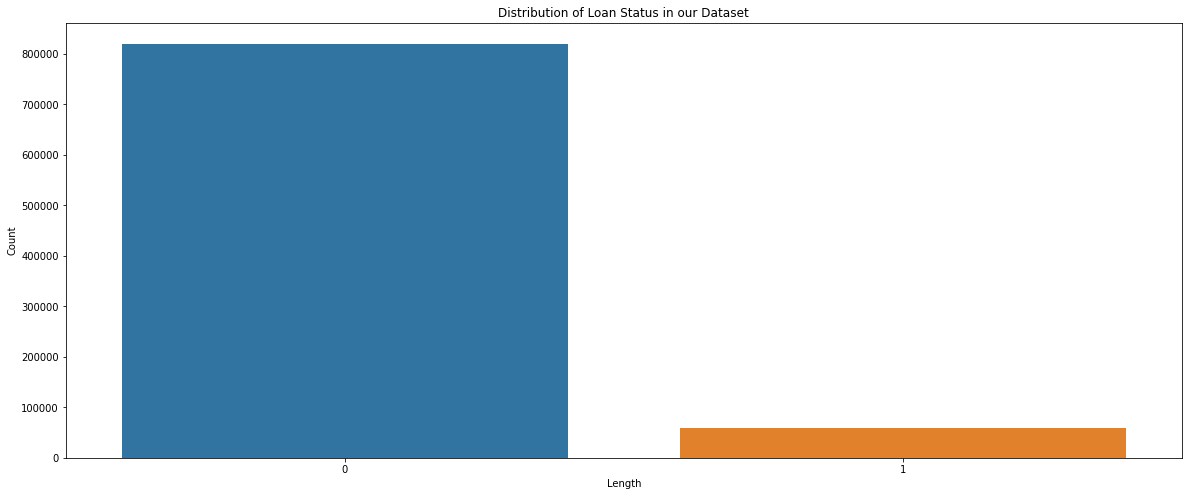

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
m =df_LC['loan_status'].value_counts()
m = m.to_frame()
m.reset_index(inplace=True)
m.columns = ['Loan Status','Count']
plt.subplots(figsize=(20,8))
sns.barplot(y='Count', x='Loan Status', data=m)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Loan Status in our Dataset")
plt.show()

As you can see, we have a lot of loans which are current with fair amount of fully paid loans. other categories (including) default have a really low number. This means the data is imbalanced and we might need to do something about this later in the analysis.

## 5 check the variables

In [61]:
df_LC.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,delinq,derog,purpose,term,home_ownership,verification_status,recovery,pymnt_received
0,5000.0,5000.0,4975.0,10.65,162.87,1,6,11.0,24000.0,0,27.65,0.0,1985,1.0,3.0,0.0,13648.0,83.7,9.0,1,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,171.62,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,36,4,2,0,1.0
1,2500.0,2500.0,2500.0,15.27,59.83,2,13,1.0,30000.0,1,1.00,0.0,1999,5.0,3.0,0.0,1687.0,9.4,4.0,1,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,119.66,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,60,4,1,1,1.0
2,2400.0,2400.0,2400.0,15.96,84.33,2,14,11.0,12252.0,0,8.72,0.0,2001,2.0,2.0,0.0,2956.0,98.5,10.0,1,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,649.91,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,11,36,4,0,0,1.0
3,10000.0,10000.0,10000.0,13.49,339.31,2,10,11.0,49200.0,0,20.00,0.0,1996,1.0,10.0,0.0,5598.0,21.0,37.0,1,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,357.48,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,9,36,4,1,0,1.0
4,3000.0,3000.0,3000.0,12.69,67.79,1,9,2.0,80000.0,0,17.94,0.0,1996,0.0,15.0,0.0,27783.0,53.9,38.0,1,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,67.79,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,9,60,4,1,0,1.0


In [62]:
df_LC.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc',
       'loan_status', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'delinq', 'derog', 'purpose', 'term',
       'home_ownership', 'verification_status', 'recovery', 'pymnt_received'],
      dtype='object')

In [63]:
df_LC.shape

(878916, 42)

In [64]:
df.shape

(887379, 74)

#### conclusion: drop *columns*

In [65]:
list(set(df.columns).difference(set(df_LC.columns)))

['dti_joint',
 'recoveries',
 'inq_fi',
 'pymnt_plan',
 'issue_d',
 'mths_since_rcnt_il',
 'zip_code',
 'collection_recovery_fee',
 'max_bal_bc',
 'emp_title',
 'id',
 'open_il_6m',
 'open_rv_12m',
 'member_id',
 'policy_code',
 'total_bal_il',
 'url',
 'inq_last_12m',
 'total_cu_tl',
 'next_pymnt_d',
 'open_il_24m',
 'mths_since_last_record',
 'last_pymnt_d',
 'mths_since_last_major_derog',
 'addr_state',
 'annual_inc_joint',
 'open_acc_6m',
 'verification_status_joint',
 'all_util',
 'open_il_12m',
 'il_util',
 'desc',
 'title',
 'mths_since_last_delinq',
 'last_credit_pull_d',
 'open_rv_24m']

#### conlusion: add column (change column name)

In [66]:
list(set(df_LC.columns).difference(set(df.columns)))

['delinq', 'pymnt_received', 'derog', 'recovery']

## 6 export training data

In [67]:
df_LC.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,delinq,derog,purpose,term,home_ownership,verification_status,recovery,pymnt_received
0,5000.0,5000.0,4975.0,10.65,162.87,1,6,11.0,24000.0,0,27.65,0.0,1985,1.0,3.0,0.0,13648.0,83.7,9.0,1,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,171.62,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,36,4,2,0,1.0
1,2500.0,2500.0,2500.0,15.27,59.83,2,13,1.0,30000.0,1,1.00,0.0,1999,5.0,3.0,0.0,1687.0,9.4,4.0,1,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,119.66,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,60,4,1,1,1.0
2,2400.0,2400.0,2400.0,15.96,84.33,2,14,11.0,12252.0,0,8.72,0.0,2001,2.0,2.0,0.0,2956.0,98.5,10.0,1,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,649.91,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,11,36,4,0,0,1.0
3,10000.0,10000.0,10000.0,13.49,339.31,2,10,11.0,49200.0,0,20.00,0.0,1996,1.0,10.0,0.0,5598.0,21.0,37.0,1,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,357.48,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,9,36,4,1,0,1.0
4,3000.0,3000.0,3000.0,12.69,67.79,1,9,2.0,80000.0,0,17.94,0.0,1996,0.0,15.0,0.0,27783.0,53.9,38.0,1,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,67.79,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,9,60,4,1,0,1.0


In [68]:
y=df_LC['loan_status']
del df_LC['loan_status']
df_LC['loan_status']=y


In [79]:
df_LC.head()
df_LC.shape
df_LC.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'delinq', 'derog', 'purpose', 'term',
       'home_ownership', 'verification_status', 'recovery', 'pymnt_received',
       'loan_status'],
      dtype='object')

In [70]:
pip install pathlib2

In [71]:
import pickle as pk
import pandas as pd
from pathlib2 import Path
import numpy as np
import os

def pk_read(path):
    with open(path, 'rb') as f:
        D = pk.load(f,encoding='utf8')
    return D

def pk_dump(fn, D):
    with open(fn, 'wb') as f:
        pk.dump(D, f, protocol=pk.HIGHEST_PROTOCOL)
    return 'Dumped Successfully!'

In [78]:
data_pk=pk_dump('/content/drive/MyDrive/Deep Learning for Prediction/Final Project/Zixin_model/result/lc_loan_processed_binary.pk',df_LC)

In [ ]:
#test_export=pk_read('/content/drive/MyDrive/Deep Learning for Prediction/Final Project/Zixin_model/result/lc_loan_processed.pk')
#test_export.shape

(878916, 42)